In [1]:
import sys
sys.path.append("../../")

In [2]:
from delay.delay import *
import delay.calculator as calc
from delay.strategy import fA_Skew45deg, fB_Skew45deg, showIntervalFunctions
from delay.simulation import Simulation, FunctionType
from delay.regression import linearRegression, Dependence
from delay.value import calculateValue
import pandas as pd

In [5]:
filePrefix = 'lin-skew45'
%run csvFilename.py
csvFilename = createCSVFilename(filePrefix)
csvFilename

{'N=20': {'ds': {'tau=1': '../../csv/N=20/lin-skew45-ds-tau-1.csv',
   'tau=2': '../../csv/N=20/lin-skew45-ds-tau-2.csv',
   'tau=3': '../../csv/N=20/lin-skew45-ds-tau-3.csv',
   'tau=4': '../../csv/N=20/lin-skew45-ds-tau-4.csv',
   'tau=5': '../../csv/N=20/lin-skew45-ds-tau-5.csv',
   'tau=6': '../../csv/N=20/lin-skew45-ds-tau-6.csv',
   'tau=20': '../../csv/N=20/lin-skew45-ds-tau-20.csv',
   'tau=50': '../../csv/N=20/lin-skew45-ds-tau-50.csv'},
  'taus': {'d=1': '../../csv/N=20/lin-skew45-taus-d-1.csv',
   'd=2': '../../csv/N=20/lin-skew45-taus-d-2.csv',
   'd=3': '../../csv/N=20/lin-skew45-taus-d-3.csv',
   'd=20': '../../csv/N=20/lin-skew45-taus-d-20.csv',
   'd=50': '../../csv/N=20/lin-skew45-taus-d-50.csv',
   'd=150': '../../csv/N=20/lin-skew45-taus-d-150.csv'}},
 'N=100': {'ds': {'tau=1': '../../csv/N=100/lin-skew45-ds-tau-1.csv',
   'tau=2': '../../csv/N=100/lin-skew45-ds-tau-2.csv',
   'tau=3': '../../csv/N=100/lin-skew45-ds-tau-3.csv',
   'tau=4': '../../csv/N=100/lin-skew45

In [4]:
simulation = Simulation(FunctionType.SKEW45, (0, 0), calculateValue, calc.linear(N=100, w=0.99))
simulation.setN(100)
simulation.setConv(100)
simulation.setDuration(100000000) # 10^8
simulation.setD(20)
simulation.setOmega(1)

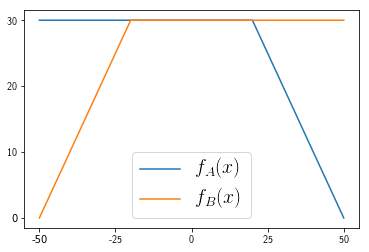

In [6]:
N = 100
showIntervalFunctions(fA_Skew45deg, fB_Skew45deg, N, d=20)

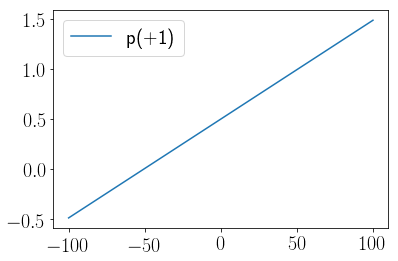

In [14]:
calc.plot(calc.linear(N=100, w=0.99))

µ =  -0.04973112261495027


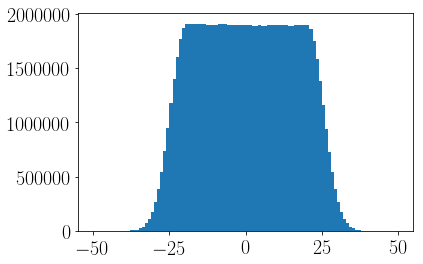

In [7]:
simulation.setTau((0, 0))
simulation.run()
simulation.plotOnlyHistogram('../../../draft/img/results/'+filePrefix+'/histogram0')

µ =  -0.5308778763032763


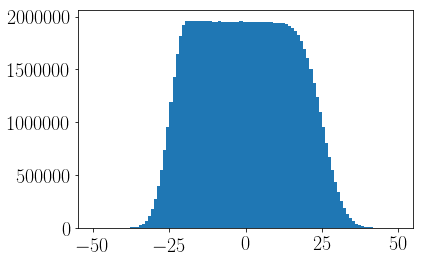

In [8]:
simulation.setTau((20, 0))
simulation.run()
simulation.plotOnlyHistogram('../../../draft/img/results/'+filePrefix+'/histogram-tauA')

µ =  0.5683218228347007


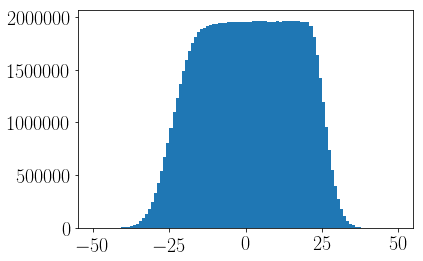

In [9]:
simulation.setTau((0, 20))
simulation.run()
simulation.plotOnlyHistogram('../../../draft/img/results/'+filePrefix+'/histogram-tauB')

In [10]:
simulation.setIterations(10)

In [11]:
taus, mus = [], [] 
simulation.setD(20)

print('d, τ, µ')
for i in range(0, 35):
    tauA = i * 2
    simulation.setTau((tauA, 0))
    simulation.run()
    simulation.systematicInfo()
    taus.append(tauA)
    mus.append(simulation.getAverage())
    
steps = len(taus)
data = {'d': [20]*steps, 'τ': taus, 'µ': mus}
df = pd.DataFrame(data = data)
df.to_csv(csvFilename['taus']);

d, τ, µ
20 ,  0 ,  -0.005662356122365114
20 ,  2 ,  -0.012554634961310733
20 ,  4 ,  -0.18611002983638184
20 ,  6 ,  -0.12544877484158218
20 ,  8 ,  -0.2659018735971724
20 ,  10 ,  -0.2022554412734744
20 ,  12 ,  -0.22437121570960075
20 ,  14 ,  -0.29201275455341463
20 ,  16 ,  -0.3697628197246649
20 ,  18 ,  -0.5644122283403884
20 ,  20 ,  -0.4714697632529774
20 ,  22 ,  -0.5575092871264837
20 ,  24 ,  -0.5686988720254958
20 ,  26 ,  -0.6615531900841152
20 ,  28 ,  -0.6613781293995011
20 ,  30 ,  -0.6868147016894645
20 ,  32 ,  -0.8675536403958019
20 ,  34 ,  -0.9509144991206924
20 ,  36 ,  -0.9758917183329804
20 ,  38 ,  -0.9813933667793312
20 ,  40 ,  -1.080377834024712
20 ,  42 ,  -1.146379563549347
20 ,  44 ,  -1.2357904905854329
20 ,  46 ,  -1.268250466286405
20 ,  48 ,  -1.3635197702171367
20 ,  50 ,  -1.3317088583972334
20 ,  52 ,  -1.47962362336558
20 ,  54 ,  -1.5271074355633925
20 ,  56 ,  -1.5643647891473371
20 ,  58 ,  -1.7114517183007991
20 ,  60 ,  -1.6470430531386209
20

Mean squared error: 0.00
Variance score: 1.00
Line: -0.03x + 0.032453


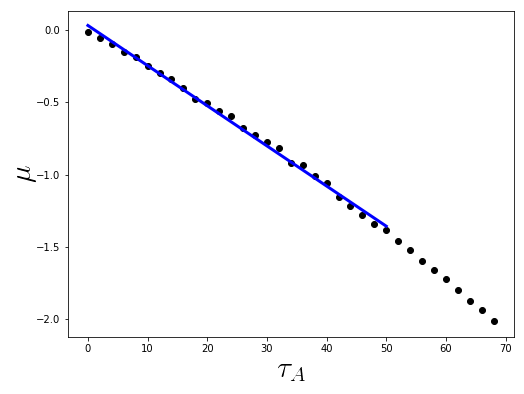

In [4]:
df = pd.read_csv(csvFilename['taus'], sep=',')
toDict = df.to_dict('l')
taus = toDict['τ']
mus = toDict['µ']

linearRegression(taus, mus, Dependence.TAU, '../../../draft/img/results/'+filePrefix+'/tau-d50', forHalfN=True, N=100);

In [13]:
ds, mus = [], []
simulation.setTau((50, 0))

print('d, τ, µ')
_ = np.arange(0, 48, step=2)
_ = np.union1d(_, np.arange(47, 51))
_ = np.union1d(_, np.arange(52, 72, step=2))
for d in _:
    simulation.setD(d)
    simulation.run()
    simulation.systematicInfo()
    ds.append(d)
    mus.append(simulation.getAverage())
    
steps = len(ds)
data = {'d': ds, 'τ': [50]*steps, 'µ': mus}
df = pd.DataFrame(data = data)
df.to_csv(csvFilename['ds']);

d, τ, µ


KeyboardInterrupt: 

Mean squared error: 0.01
Variance score: 0.78
Line: -0.01x + -0.217790


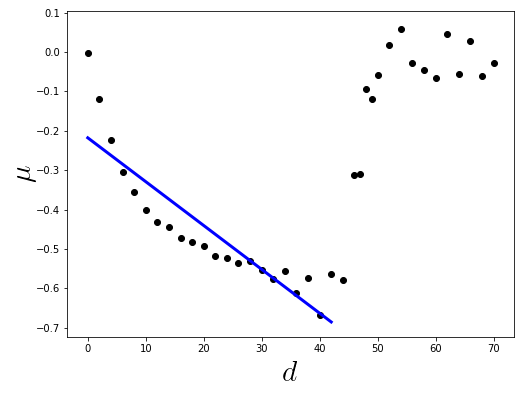

In [5]:
df = pd.read_csv(csvFilename['ds'], sep=',')
toDict = df.to_dict('l')
ds = toDict['d']
mus = toDict['µ']

linearRegression(ds, mus, Dependence.D, '../../../draft/img/results/'+filePrefix+'/d-tau50', forHalfN=True, N=100);

Mean squared error: 0.01
Variance score (R^2): 0.99
Line: -0.03τ + -0.017110


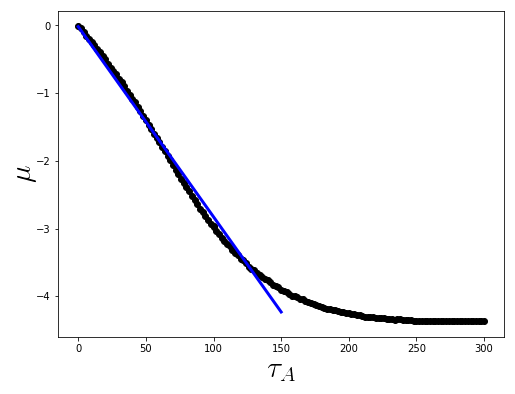

In [21]:
df = pd.read_csv('../../csv/N=100/lin-skew45-taus-d20.csv', sep=',')
toDict = df.to_dict('l')
taus = toDict['τ']
mus = toDict['µ']

linearRegression(taus, mus, Dependence.TAU, '../../../draft/img/results/'+filePrefix+'/N=100/taus-d20-more', showFit=True, smallerThan=150
);

In [19]:
filePrefix

'lin-skew45'